# SOK-1006 Arbeidskrav (7)

## Fra forelesning

In [1]:
# Laster inn pakker.
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def fortj(p, x):
    return p*x-(16+x**2)

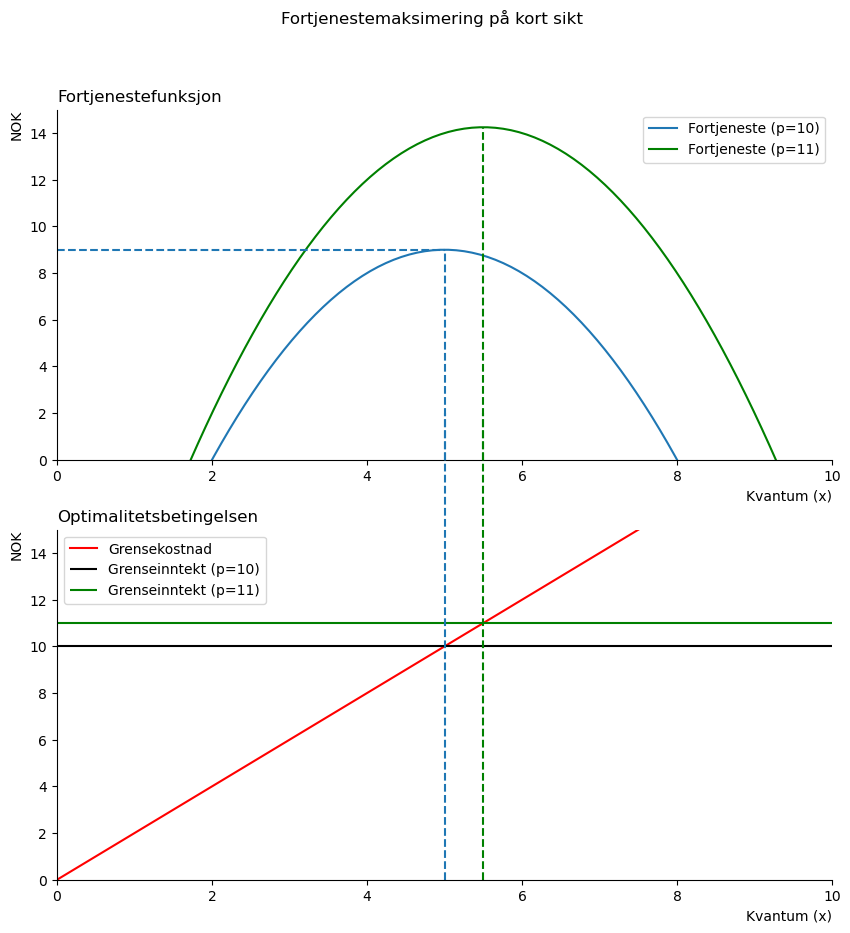

In [3]:
x = np.linspace(0,10,100)

# Bruk axs for å definere aksene

fig, axs = plt.subplots(2,1, sharex=True, figsize=(10,10))

# Plott av linjene

axs[0].plot(x,fortj(10, x),label='Fortjeneste (p=10)')
axs[0].plot(x,fortj(11, x), color= 'green', label='Fortjeneste (p=11)')
axs[1].plot(x,2*x, color="red", label='Grensekostnad')
axs[1].hlines(10,0,10, color="black", label='Grenseinntekt (p=10)')
axs[1].hlines(11,0,10, color="green", label='Grenseinntekt (p=11)')

axs[0].vlines(5,0, 9, linestyles='dashed')
axs[0].hlines(9,0, 5, linestyles='dashed')
axs[1].vlines(5,0,20, linestyles='dashed', clip_on=False)
axs[1].vlines(5.5,0,20, color='green', linestyles='dashed', clip_on=False)
axs[0].vlines(5.5,0,14.25, color='green', linestyles='dashed', clip_on=False)




# Bruk løkke for å tegne aksene

for i in range(2):

    axs[i].set_ylabel('NOK', loc='top')
    axs[i].set_xlabel('Kvantum (x)', loc='right')
    axs[i].set(xlim=(0,10),ylim=(0,15))
    axs[i].spines['top'].set_color('none')
    axs[i].spines['right'].set_color('none')
    axs[i].tick_params(labelbottom=True)
    axs[i].legend(loc='best')

# Gi en passende tittel

axs[0].set_title('Fortjenestefunksjon', loc='left')
axs[1].set_title('Optimalitetsbetingelsen', loc='left')

fig.suptitle('Fortjenestemaksimering på kort sikt');

In [4]:
# Definerer symboler
x,N,p = sp.symbols('x N p', positive=True, real=True) 

In [5]:
def prod_ks(N):
    return N**.4

# løs x=f(N)
N_ks = sp.solve(prod_ks(N)-x,N)[0]
N_ks

x**(5/2)

In [6]:
Kostnad=5+3*N_ks
Kostnad

3*x**(5/2) + 5

In [7]:
# tilbudet gis av likning (3) p=GK
GK = sp.diff(Kostnad, x)
GK

15*x**(3/2)/2

In [8]:
AOB=sp.diff(GK,x)
AOB

45*sqrt(x)/4

In [9]:
# vi gjør klart for å plotte
Kostnad_fn=sp.lambdify(x, Kostnad)

GK_fn=sp.lambdify(x, GK)

display(Kostnad_fn(x))
display(GK_fn(x))

3*x**2.5 + 5

7.5*x**1.5

In [10]:
def AC(x):
    return Kostnad_fn(x)/x
# finn lavest x som gir positiv fortjeneste, dvs reservasjonsprisen

lavest_x=sp.solve(AC(x)-GK_fn(x),x)[0]
lavest_x

1.04304488151063

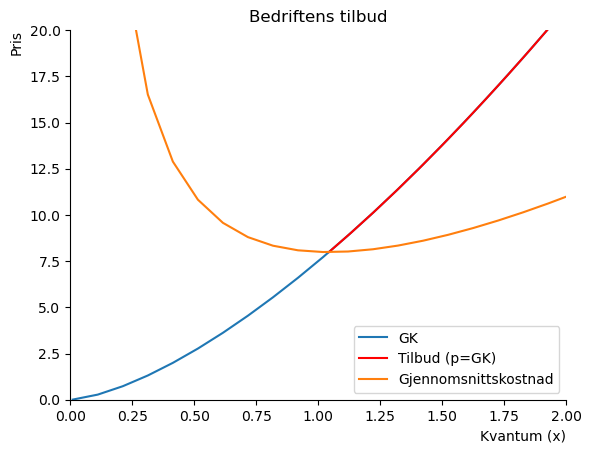

In [11]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')


ax.set_title('Bedriftens tilbud')
ax.legend(loc='best');

## Oppgave

En bedrift produserer en vare med produktfunksjon $x = N^{\frac{2}{5}}K^{\frac{1}{4}}$ (som i Eksempel 2.1). Vis i en figur hvordan tilbudskurven endres når (i) $K$ økes, (ii) $w$ økes og (iii) $r$ økes. Forklar intuisjonen bak dine funn.

In [16]:
# Definerer symboler i sympy.
K, w, r = sp.symbols("K w r", positive = True, real = True)

In [17]:
# Definerer produktfunksjonen.
def prod(N, K):
    return N**0.4*K**0.25

In [30]:
# Løser x = f(N).
N_solved = sp.solve(prod(N, K)-x, N) [0]

# Finner kostnadsfunksjonen
cost = r+w*N_solved

# Lager generelle løsninger.
GK_gen = sp.diff(cost, x)
AOB_gen = sp.diff(N_solved, x)

In [34]:
# Transformerer til lambdify funksjon.
cost_func = sp.lambdify((x, w, K, r), cost)
GK_func = sp.lambdify((x, w, K), GK_gen)

In [36]:
# Lager funksjon for å finne lavest mulig x.
def AC_t(x, w, K, r):
    return cost_func(x, w, K, r) / x

In [41]:
# Finner lavest mulig x og 
low_x = sp.solve(AC_t(x, w, K, r) - GK_func(x, w, K), x) [2]

# Transformerer til lambdify funksjon.
low_x_func = sp.lambdify((w, K, r), low_x)

In [44]:
# Definerer intervaller til å tegne figurer.
x_k = np.linspace(float(low_x_func(3, 2, 5)), 10, 100)
x_w = np.linspace(float(low_x_func(4, 1, 5)), 10, 100)
x_r = np.linspace(float(low_x_func(3, 1, 6)), 10, 100)

In [76]:
# Lager en funksjon for basisfiguren.
def figure():
    fig, ax = plt.subplots()
    ax.set_xlabel("Kvantum (x)", loc = "right")
    ax.set_ylabel("Pris", loc = "top")
    ax.set(xlim = (0, 2))
    ax.set(ylim = (0, 20))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.plot(x_num, GK_fn(x_num), label = 'GK')
    ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
    ax.plot(x_num, AC(x_num), label = 'Gj.snittkost.')
    return fig, ax

In [77]:
# Figur: økning i K.
# Henter basisfiguren.
fig_k, ax = figure()

# Plotter økning i K.
ax.plot(x_num, GK_func(x_num, 3, 2), color = "green",  label = "GK, K = 2")
ax.plot(x_num, AC_t(x_num, 3, 2, 5), color = "cyan",   label = "Gj.snittkost. K = 2")
ax.plot(x_k, GK_func(x_k, 3, 2),     color = "purple", label = "Tilbud, K = 2")

# Legger til tittel og legend.
ax.set_title("Økning i K")
ax.legend(bbox_to_anchor = (1.155, 0.8));

En økning i $K$ (realkapital) fører til en lavere gj.snittkostnad og lavere grensekostnad. Dette medfører en lavere pris per enhet.

In [78]:
# Figur: økning i w.
# Henter basisfiguren.
fig_w, ax = figure()

# Plotter økning i K.
ax.plot(x_num, GK_func(x_num, 4, 1), color = "green",  label = "GK, w = 4")
ax.plot(x_num, AC_t(x_num, 4, 1, 5), color = "cyan",   label = "Gj.snittkost. w = 4")
ax.plot(x_w, GK_func(x_w, 4, 1),     color = "purple", label = "Tilbud, w = 2")

# Legger til tittel og legend.
ax.set_title("Økning i w")
ax.legend(bbox_to_anchor = (1.155, 0.8));

En økning i $w$ (arbeidskraft) fører til en høyere gj.snittkostnad og høyere grensekostnad. Dette medfører en høyere pris per enhet.

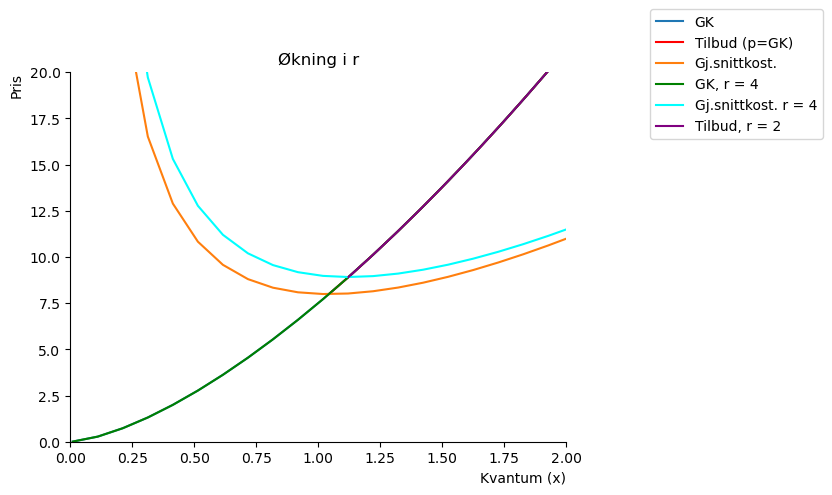

In [80]:
# Figur: økning i r.
# Henter basisfiguren.
fig_r, ax = figure()

# Plotter økning i K.
ax.plot(x_num, GK_func(x_num, 3, 1), color = "green",  label = "GK, r = 4")
ax.plot(x_num, AC_t(x_num, 3, 1, 6), color = "cyan",   label = "Gj.snittkost. r = 4")
ax.plot(x_r, GK_func(x_r, 3, 1),     color = "purple", label = "Tilbud, r = 2")

# Legger til tittel og legend.
ax.set_title("Økning i r")
ax.legend(bbox_to_anchor = (1.155, 0.8));

En økning i $r$ (fast kostnad) fører kun til en høyere gj.snittkostnad. 